In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt


In [2]:

# Parameters
learning_rate = 0.01
training_epochs = 1000
display_step = 50

In [3]:
# Training Data
train_X = np.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
                         7.042,10.791,5.313,7.997,5.654,9.27,3.1])
train_Y = np.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
                         2.827,3.465,1.65,2.904,2.42,2.94,1.3])
n_samples = train_X.shape[0]

In [4]:
# tf Graph Input
X = tf.placeholder("float")
Y = tf.placeholder("float")

# Set model weights
W = tf.Variable(np.random.randn(), name="weight")
b = tf.Variable(np.random.randn(), name="bias")

In [5]:

# Construct a linear model
pred = tf.add(tf.multiply(X, W), b)

In [6]:
# Mean squared error
cost = tf.reduce_sum(tf.pow(pred-Y, 2))/(2*n_samples)
# Gradient descent
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [7]:
#Initialize the global variables
init = tf.global_variables_initializer()


Epoch: 0050 cost= 0.083604693 W= 0.295244 b= 0.47306
Epoch: 0100 cost= 0.082837559 W= 0.292529 b= 0.492593
Epoch: 0150 cost= 0.082159184 W= 0.289975 b= 0.510962
Epoch: 0200 cost= 0.081559315 W= 0.287574 b= 0.52824
Epoch: 0250 cost= 0.081028879 W= 0.285315 b= 0.544491
Epoch: 0300 cost= 0.080559827 W= 0.28319 b= 0.559775
Epoch: 0350 cost= 0.080145076 W= 0.281192 b= 0.57415
Epoch: 0400 cost= 0.079778358 W= 0.279312 b= 0.587671
Epoch: 0450 cost= 0.079454131 W= 0.277545 b= 0.600388
Epoch: 0500 cost= 0.079167463 W= 0.275882 b= 0.612348
Epoch: 0550 cost= 0.078914106 W= 0.274319 b= 0.623594
Epoch: 0600 cost= 0.078690067 W= 0.272848 b= 0.634173
Epoch: 0650 cost= 0.078492016 W= 0.271466 b= 0.644121
Epoch: 0700 cost= 0.078316964 W= 0.270165 b= 0.653478
Epoch: 0750 cost= 0.078162193 W= 0.268941 b= 0.662279
Epoch: 0800 cost= 0.078025393 W= 0.267791 b= 0.670557
Epoch: 0850 cost= 0.077904463 W= 0.266709 b= 0.678342
Epoch: 0900 cost= 0.077797584 W= 0.265691 b= 0.685664
Epoch: 0950 cost= 0.077703126 W=

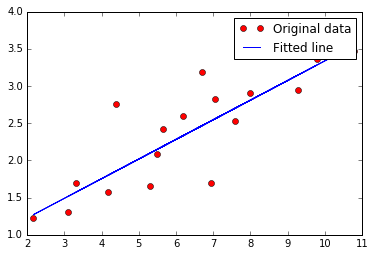

In [8]:
# Launch the graph
with tf.Session() as sess:
    sess.run(init)

    # Fit all training data
    for epoch in range(training_epochs):
        for (x, y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict={X: x, Y: y})

        #Display logs per epoch step
        if (epoch+1) % display_step == 0:
            c = sess.run(cost, feed_dict={X: train_X, Y:train_Y})
            print "Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c), \
                "W=", sess.run(W), "b=", sess.run(b)

    print "Optimization Finished!"
    training_cost = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
    print "Training cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n'
    #Plot the results
    plt.plot(train_X, train_Y, 'ro', label='Original data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()